# Book Recommenmdation System

# 1) Problem Statement

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

#### Business objective- Generate the features from the dataset and use them to recommend the books according to the users

## Data
● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# 2) Importing Libraries

In [2]:
#Importinf Libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


# 3) Importing Dataset

In [3]:
#Users data
users = pd.read_csv("Users.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
#Book data
books = pd.read_csv("Books.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [6]:
#Rating data
ratings = pd.read_csv("Ratings.csv",low_memory=False,error_bad_lines=False,encoding="latin-1")
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [7]:
# Dimension of Dataset

In [8]:
users.shape,ratings.shape,books.shape

((278858, 3), (1149780, 3), (271360, 8))

# 4) Data preprocessing and EDA

# 1) Users_dataset

In [9]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [10]:
missing_values(users)

index  Missing Values  % of Total Values Data_type
0       Age          110762              39.72   float64
1   User-ID               0               0.00     int64
2  Location               0               0.00    object

    Age have about 39% of missing values.

In [11]:
#Age distribution

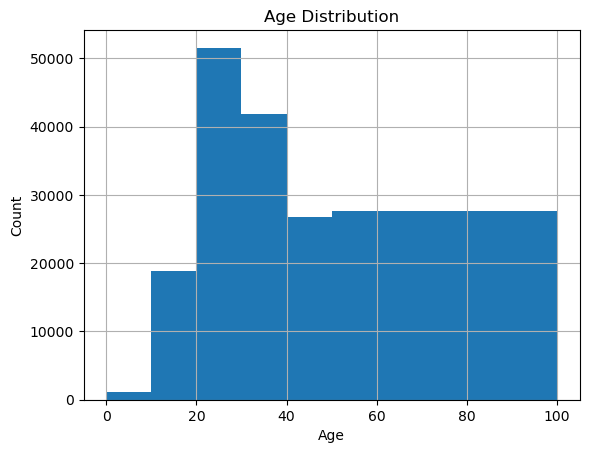

In [12]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are ampong those in their 20-40s of age

Text(0.5, 1.0, 'Find outlier data in Age column')

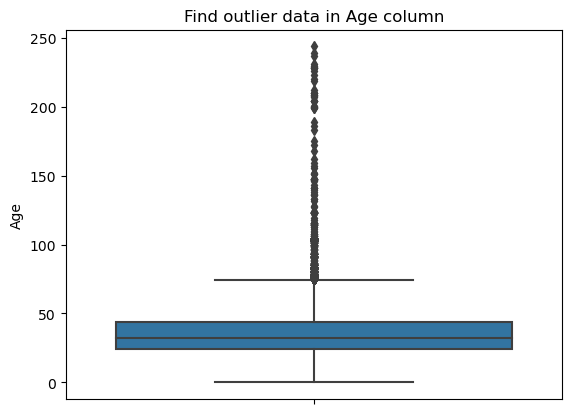

In [13]:
#Outliers detection
sns.boxplot(y = 'Age', data= users)
plt.title('Find outlier data in Age column')

In [14]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Ok we have Outlier data in Age

In [15]:
#lets find our unique value in location column

In [16]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [17]:
users.Location.nunique()

57339

57339 unique values, its really hard to understand
so lets create column Country

In [18]:
for i in users :
    users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [19]:
users.Country.nunique()

529

In [20]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [21]:
users

User-ID   Age         Country
0             1   NaN             usa
1             2  18.0             usa
2             3   NaN          russia
3             4  17.0        portugal
4             5   NaN  united kingdom
...         ...   ...             ...
278853   278854   NaN             usa
278854   278855  50.0  united kingdom
278855   278856   NaN          canada
278856   278857   NaN             usa
278857   278858   NaN         ireland

[278858 rows x 3 columns]

In [22]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [23]:
users['Country'] = users['Country'].astype('str')

In [24]:
a = list(users.Country.unique())
a =set(a)
a= list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings , Lets correct it.

In [25]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

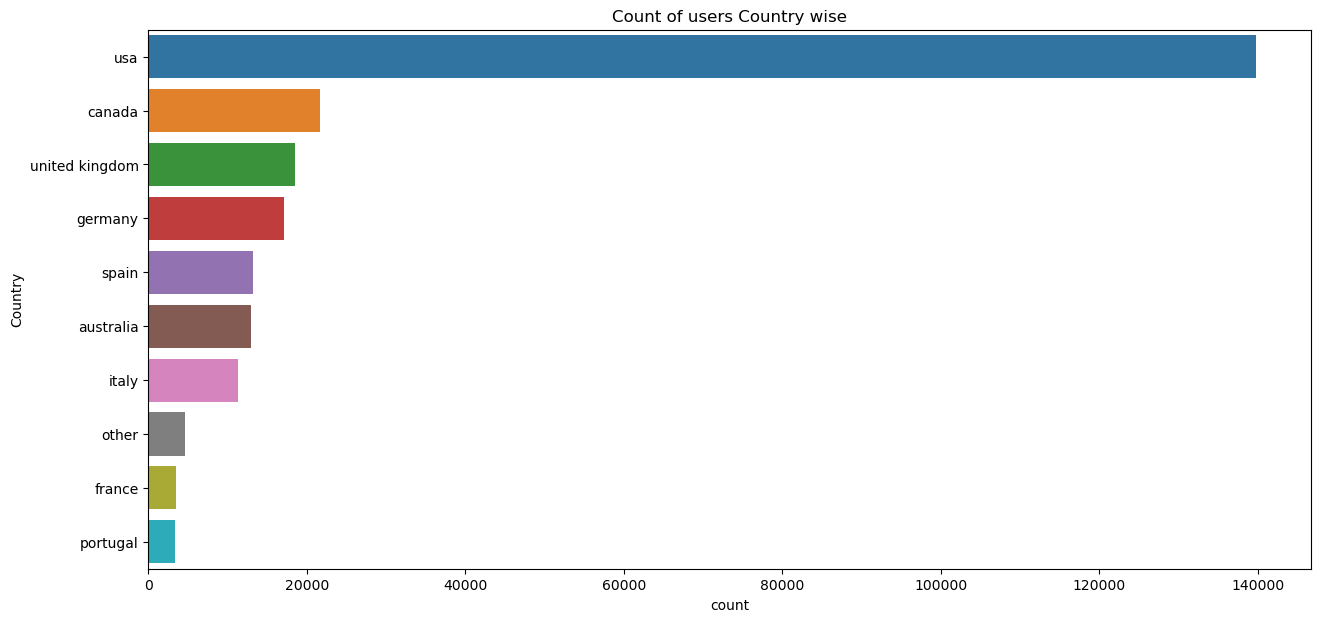

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

Most number of users are from USA

In [27]:
#Lets treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

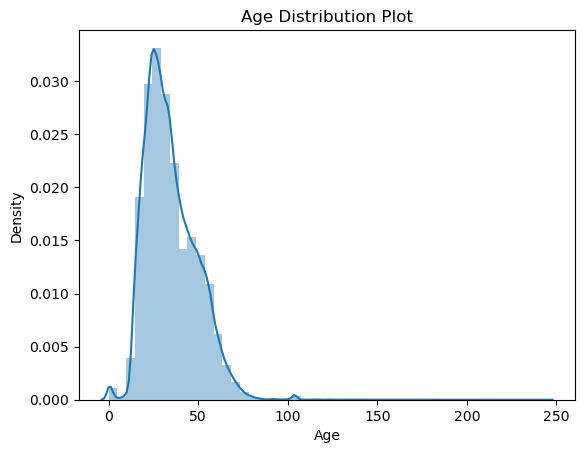

In [28]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [29]:
#Outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [30]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [31]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [32]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean

In [33]:
users['Age'].fillna(users.Age.mean(), inplace=True)

In [34]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

# 2)Books_Dataset

In [35]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [36]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

In [37]:
#Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

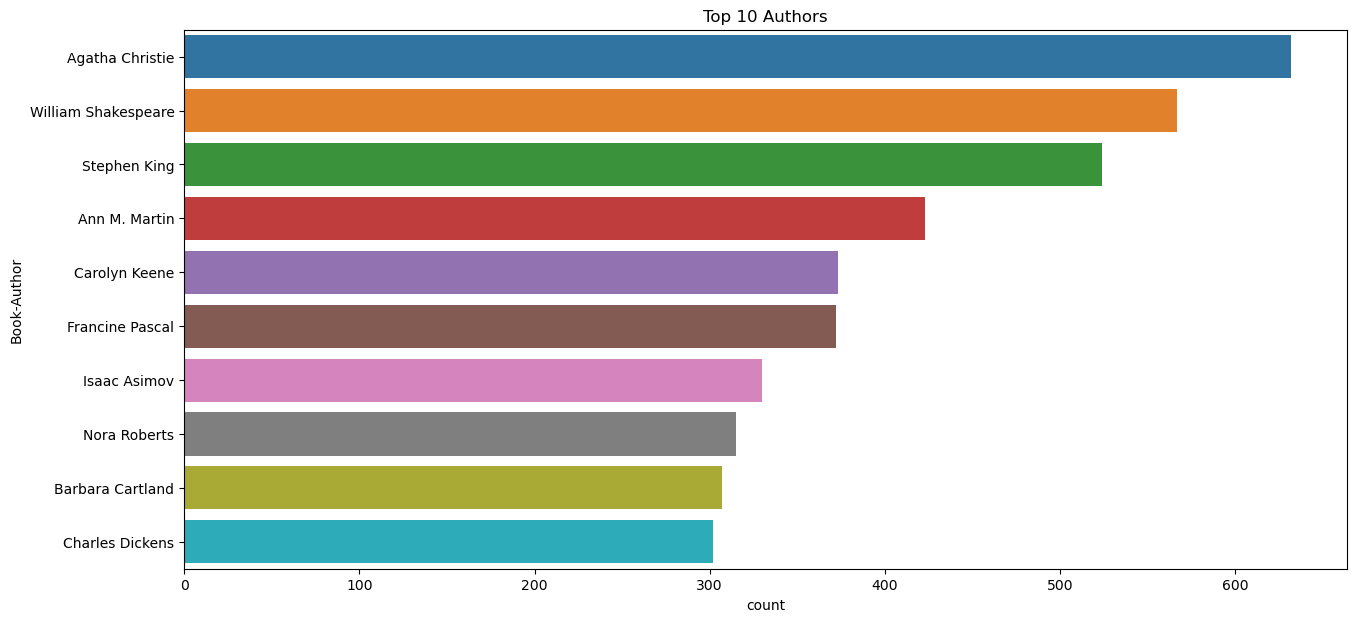

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [39]:
#Top 10 Publisher which have published the most books

Text(0.5, 1.0, 'Top 10 Publishers')

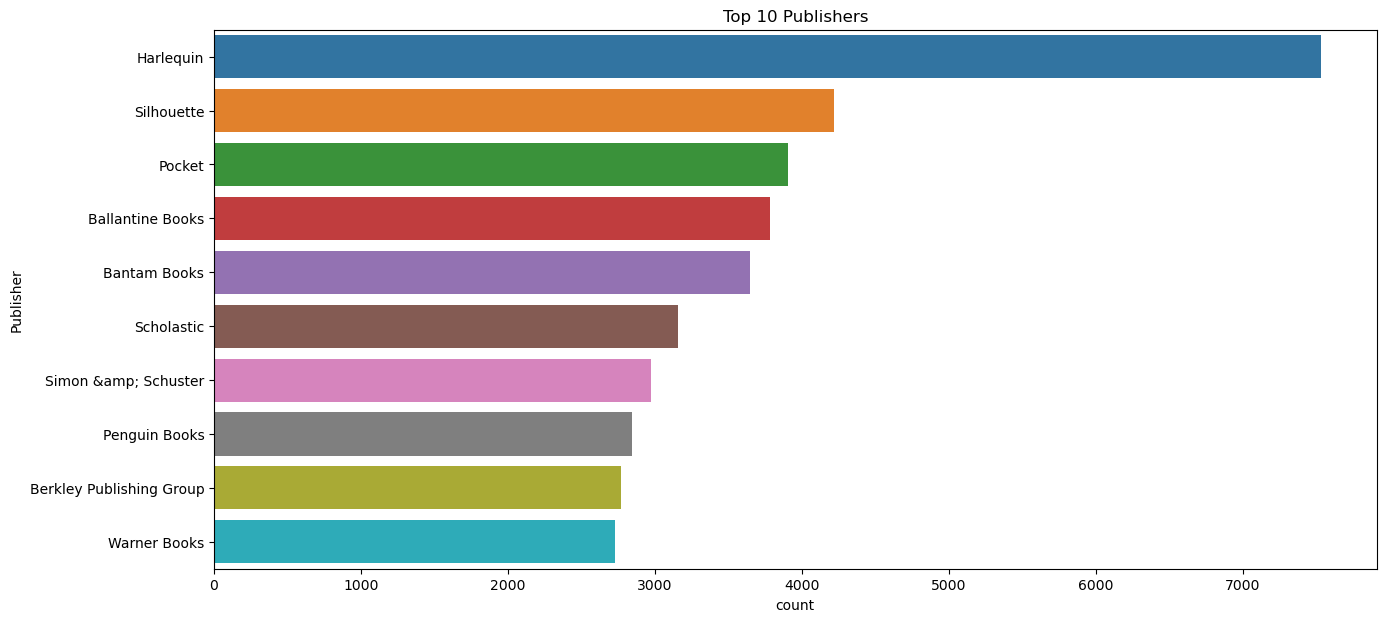

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [41]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [42]:
#investigating the rows having 'DK Publishing Inc' as year Of Publication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [43]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [44]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [45]:
#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

               Book-Author Year-Of-Publication          Publisher  \
209538  Michael Teitelbaum                2000  DK Publishing Inc   
221678       James Buckley                2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [46]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [47]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

ISBN                             Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers   

                            Book-Author Year-Of-Publication  Publisher  \
220731  Jean-Marie Gustave Le ClÃ?Â©zio                2003  Gallimard   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [48]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [49]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [50]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [51]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [52]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae               2002.0   
129037  1931696993  Finders Keepers  Linnea Sinclair               2001.0   

       Publisher  
128890       NaN  
129037       NaN

In [53]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [54]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

ISBN                                         Book-Title  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author  Year-Of-Publication                       Publisher  
187689         NaN               1995.0  Edinburgh Financial Publishing

In [55]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [56]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 3) Ratings Dataset

In [57]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

Ratings dataset should have books only which exist in our books dataset

In [58]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape, ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of books dataset got dropped off

Ratings dataset should have ratings from users which exist in users dataset.



In [59]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset.

Let's see how the ratings are distributed

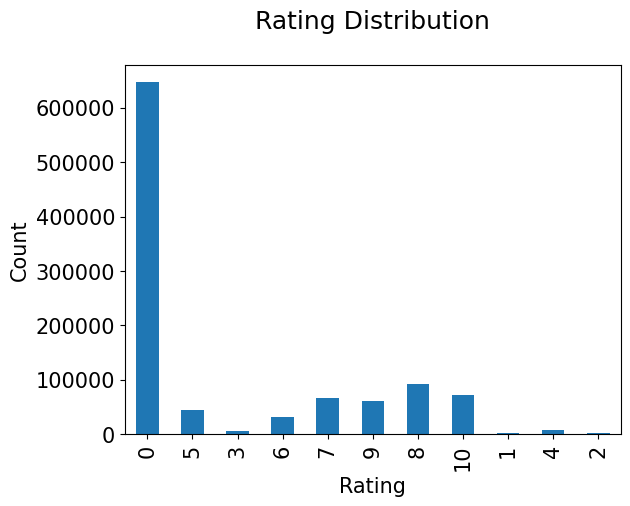

In [60]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [61]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [62]:
print('ratings_explicit dataset',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

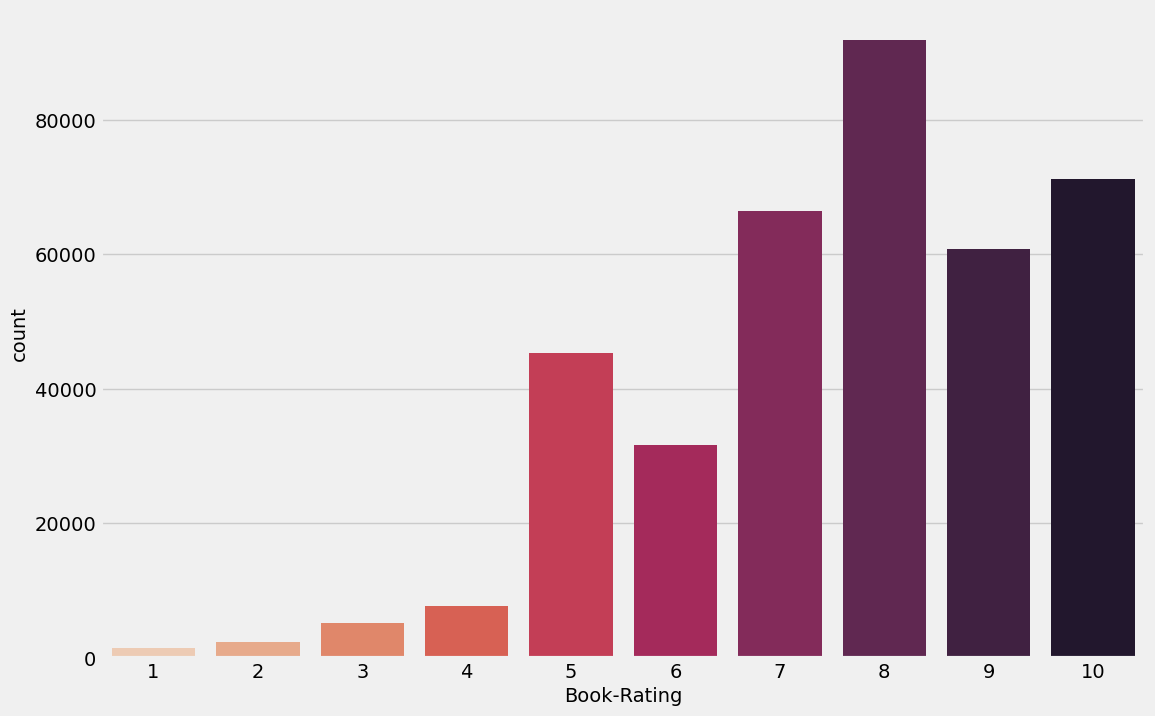

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

In [64]:
#Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

Book-Rating
ISBN                   
0316666343          707
0971880107          581
0385504209          487
0312195516          383
0060928336          320

The book with ISBN '0316666343' received the most rating counts.

In [65]:
#Let’s find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                       Book-Title    Book-Author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

   Year-Of-Publication      Publisher  
0               2002.0  Little, Brown  
1               2004.0        Too Far  
2               2003.0      Doubleday  
3               1998.0    Picador USA  
4               1997.0      Perennial

The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [66]:
#create column Rating Average
ratings_explicit ['Avg_Rating'] = ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

In [67]:
#Cearting column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [68]:
ratings_explicit

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
1         276726  0155061224            5    5.000000                        1
3         276729  052165615X            3    3.000000                        1
4         276729  0521795028            6    6.000000                        1
8         276744  038550120X            7    7.580247                       81
16        276747  0060517794            9    8.000000                       30
...          ...         ...          ...         ...                      ...
1149771   276704  0743211383            7    6.964912                       57
1149773   276704  0806917695            5    5.000000                        1
1149775   276704  1563526298            9    7.000000                        3
1149777   276709  0515107662           10    8.444444                       18
1149778   276721  0590442449           10    9.000000                        2

[383842 rows x 5 columns]

# Merging All Dataset

In [69]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [70]:
Final_Dataset

User-ID   Age Country        ISBN  Book-Rating  Avg_Rating  \
0             8  33.0  canada  0002005018            5    7.666667   
1         11676  28.0     nan  0002005018            8    7.666667   
2         67544  30.0  canada  0002005018            8    7.666667   
3        116866  32.0   other  0002005018            9    7.666667   
4        123629  33.0  canada  0002005018            9    7.666667   
...         ...   ...     ...         ...          ...         ...   
383837   278851  33.0     usa  0767907566            5    5.000000   
383838   278851  33.0     usa  0789721260            5    5.000000   
383839   278851  33.0     usa  0884159221            7    7.000000   
383840   278851  33.0     usa  0912333022            7    7.000000   
383841   278851  33.0     usa  1569661057           10   10.000000   

        Total_No_Of_Users_Rated  \
0                             9   
1                             9   
2                             9   
3                             9   
4                             9   
...                         ...   
383837                        1   
383838                        1   
383839                        1   
383840                        1   
383841                        1   

                                               Book-Title  \
0                                            Clara Callan   
1                                            Clara Callan   
2                                            Clara Callan   
3                                            Clara Callan   
4                                            Clara Callan   
...                                                   ...   
383837  All Elevations Unknown: An Adventure in the He...   
383838                            WebClasses From Scratch   
383839  Why stop?: A guide to Texas historical roadsid...   
383840  The Are You Being Served? Stories: 'Camping In...   
383841  Dallas Street Map Guide and Directory, 2000 Ed...   

                 Book-Author  Year-Of-Publication                 Publisher  
0       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
1       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
2       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
3       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
4       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
...                      ...                  ...                       ...  
383837          Sam Lightner               2001.0            Broadway Books  
383838         Jesse Liberty               1999.0                       Que  
383839         Claude Dooley               1985.0           Lone Star Books  
383840          Jeremy Lloyd               1997.0                Kqed Books  
383841                Mapsco               1999.0  American Map Corporation  

[383842 rows x 11 columns]

In [71]:
missing_values(Final_Dataset)

index  Missing Values  % of Total Values Data_type
0                   User-ID               0                0.0     int64
1                       Age               0                0.0   float64
2                   Country               0                0.0    object
3                      ISBN               0                0.0    object
4               Book-Rating               0                0.0     int64
5                Avg_Rating               0                0.0   float64
6   Total_No_Of_Users_Rated               0                0.0     int64
7                Book-Title               0                0.0    object
8               Book-Author               0                0.0    object
9       Year-Of-Publication               0                0.0   float64
10                Publisher               0                0.0    object

In [72]:
Final_Dataset.shape

(383842, 11)

# 5) Model Building

# Collaborative Filtering based Recommendation System

In [73]:
Final_Dataset

User-ID   Age Country        ISBN  Book-Rating  Avg_Rating  \
0             8  33.0  canada  0002005018            5    7.666667   
1         11676  28.0     nan  0002005018            8    7.666667   
2         67544  30.0  canada  0002005018            8    7.666667   
3        116866  32.0   other  0002005018            9    7.666667   
4        123629  33.0  canada  0002005018            9    7.666667   
...         ...   ...     ...         ...          ...         ...   
383837   278851  33.0     usa  0767907566            5    5.000000   
383838   278851  33.0     usa  0789721260            5    5.000000   
383839   278851  33.0     usa  0884159221            7    7.000000   
383840   278851  33.0     usa  0912333022            7    7.000000   
383841   278851  33.0     usa  1569661057           10   10.000000   

        Total_No_Of_Users_Rated  \
0                             9   
1                             9   
2                             9   
3                             9   
4                             9   
...                         ...   
383837                        1   
383838                        1   
383839                        1   
383840                        1   
383841                        1   

                                               Book-Title  \
0                                            Clara Callan   
1                                            Clara Callan   
2                                            Clara Callan   
3                                            Clara Callan   
4                                            Clara Callan   
...                                                   ...   
383837  All Elevations Unknown: An Adventure in the He...   
383838                            WebClasses From Scratch   
383839  Why stop?: A guide to Texas historical roadsid...   
383840  The Are You Being Served? Stories: 'Camping In...   
383841  Dallas Street Map Guide and Directory, 2000 Ed...   

                 Book-Author  Year-Of-Publication                 Publisher  
0       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
1       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
2       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
3       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
4       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
...                      ...                  ...                       ...  
383837          Sam Lightner               2001.0            Broadway Books  
383838         Jesse Liberty               1999.0                       Que  
383839         Claude Dooley               1985.0           Lone Star Books  
383840          Jeremy Lloyd               1997.0                Kqed Books  
383841                Mapsco               1999.0  American Map Corporation  

[383842 rows x 11 columns]

In [74]:
x = Final_Dataset.groupby('User-ID').count()['Book-Rating'] >50
y = x[x].index

In [75]:
x

User-ID
8         False
9         False
12        False
14        False
16        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 68091, dtype: bool

In [76]:
y

Int64Index([   254,    638,   1424,   1733,   1903,   2033,   2110,   2276,
              2766,   2891,
            ...
            274004, 274061, 274111, 274301, 275970, 276680, 277427, 278137,
            278188, 278418],
           dtype='int64', name='User-ID', length=1150)

In [77]:
filtered_rating = Final_Dataset[Final_Dataset['User-ID'].isin(y)]

In [78]:
filtered_rating

User-ID   Age Country        ISBN  Book-Rating  Avg_Rating  \
1         11676  28.0     nan  0002005018            8    7.666667   
3        116866  32.0   other  0002005018            9    7.666667   
19         6242  33.0  canada  0452264464            5    7.772152   
22        11676  28.0     nan  0452264464            8    7.772152   
27        22625  54.0     usa  0452264464            9    7.772152   
...         ...   ...     ...         ...          ...         ...   
383771   278418  36.0     usa  0821726595            6    6.000000   
383772   278418  36.0     usa  0865926433            5    5.000000   
383773   278418  36.0     usa  155882068X            5    5.000000   
383774   278418  36.0     usa  1569751544            3    3.000000   
383775   278418  36.0     usa  1570423008            5    5.000000   

        Total_No_Of_Users_Rated  \
1                             9   
3                             9   
19                           79   
22                           79   
27                           79   
...                         ...   
383771                        1   
383772                        1   
383773                        1   
383774                        1   
383775                        1   

                                               Book-Title  \
1                                            Clara Callan   
3                                            Clara Callan   
19                   Beloved (Plume Contemporary Fiction)   
22                   Beloved (Plume Contemporary Fiction)   
27                   Beloved (Plume Contemporary Fiction)   
...                                                   ...   
383771                           Mistress of Falcon Court   
383772            Yogi Bear and the Uojpbtcutpakic: Story   
383773                   The Balloon Man (Crime Classics)   
383774  The Sleep Solution: A 21-Night Program to Bett...   
383775  In Search of Stones : A Pilgrimage of Faith, R...   

                 Book-Author  Year-Of-Publication                 Publisher  
1       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
3       Richard Bruce Wright               2001.0     HarperFlamingo Canada  
19             Toni Morrison               1994.0                     Plume  
22             Toni Morrison               1994.0                     Plume  
27             Toni Morrison               1994.0                     Plume  
...                      ...                  ...                       ...  
383771     Charlotte Lammert               1989.0  Kensington Pub Corp (Mm)  
383772       Horace J. Elias               1981.0         Granite Impex Ltd  
383773   Charlotte Armstrong               1990.0     Independent Pub Group  
383774            Nigel Ball               1998.0             Ulysses Press  
383775         M. Scott Peck               1995.0   Time Warner Audio Major  

[151924 rows x 11 columns]

In [79]:
y1 = filtered_rating.groupby('Book-Title').count()['Book-Rating']>= 10
famous_books = y1[y1].index

In [80]:
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two',
       '2061: Odyssey Three', '2nd Chance', '311 Pelican Court', '3rd Degree',
       '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       ...
       'Wuthering Heights (Penguin Classics)', 'Xanth 14: Question Quest',
       'Xanth 15: The Color of Her Panties', 'YOU BELONG TO ME',
       'Year of Wonders', 'You Belong To Me', 'You Belong to Me', 'Yukon Ho!',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1697)

In [81]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books) ]
final_ratings

User-ID   Age    Country        ISBN  Book-Rating  Avg_Rating  \
19         6242  33.0     canada  0452264464            5    7.772152   
22        11676  28.0        nan  0452264464            8    7.772152   
27        22625  54.0        usa  0452264464            9    7.772152   
31        36907  39.0     canada  0452264464           10    7.772152   
36        58363  81.0        usa  0452264464            5    7.772152   
...         ...   ...        ...         ...          ...         ...   
381804   270820  52.0        usa  0606298347            7    7.000000   
382030   271705  25.0        usa  0613212320           10   10.000000   
382625   274061  26.0        usa  1551663147           10   10.000000   
382739   274301  41.0  australia  0449000729           10   10.000000   
383149   275970  46.0        usa  1586210661            9    9.000000   

        Total_No_Of_Users_Rated                            Book-Title  \
19                           79  Beloved (Plume Contemporary Fiction)   
22                           79  Beloved (Plume Contemporary Fiction)   
27                           79  Beloved (Plume Contemporary Fiction)   
31                           79  Beloved (Plume Contemporary Fiction)   
36                           79  Beloved (Plume Contemporary Fiction)   
...                         ...                                   ...   
381804                        1                            The Vision   
382030                        1              Blindness (Harvest Book)   
382625                        1                                 Fever   
382739                        1           Sarum: The Novel of England   
383149                        1                Me Talk Pretty One Day   

              Book-Author  Year-Of-Publication  \
19          Toni Morrison               1994.0   
22          Toni Morrison               1994.0   
27          Toni Morrison               1994.0   
31          Toni Morrison               1994.0   
36          Toni Morrison               1994.0   
...                   ...                  ...   
381804     Dean R. Koontz               1986.0   
382030      Jose Saramago               2000.0   
382625   Elizabeth Lowell               1997.0   
382739  Edward Rutherfurd               1997.0   
383149      David Sedaris               2001.0   

                                          Publisher  
19                                            Plume  
22                                            Plume  
27                                            Plume  
31                                            Plume  
36                                            Plume  
...                                             ...  
381804  Turtleback Books Distributed by Demco Media  
382030                              Sagebrush Bound  
382625                                         Mira  
382739                             Ballantine Books  
383149                      Time Warner Audio Major  

[32276 rows x 11 columns]

In [82]:
final_ratings['User-ID'].nunique()

1128

# Item- Item Based Filtering

In [83]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [84]:
pt

User-ID                                             254     638     1424    \
Book-Title                                                                   
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2010: Odyssey Two                                      NaN     NaN     NaN   
2061: Odyssey Three                                    NaN     NaN     NaN   
2nd Chance                                             NaN     9.0     NaN   
...                                                    ...     ...     ...   
You Belong To Me                                       NaN     NaN     NaN   
You Belong to Me                                       NaN     NaN     NaN   
Yukon Ho!                                              NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             1733    1903    2033    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2010: Odyssey Two                                      NaN     NaN     NaN   
2061: Odyssey Three                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
...                                                    ...     ...     ...   
You Belong To Me                                       NaN     NaN     NaN   
You Belong to Me                                       NaN     NaN     NaN   
Yukon Ho!                                              NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             2110    2276    2766    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2010: Odyssey Two                                      NaN     NaN     NaN   
2061: Odyssey Three                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
...                                                    ...     ...     ...   
You Belong To Me                                       NaN     NaN     NaN   
You Belong to Me                                       NaN     NaN     NaN   
Yukon Ho!                                              NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             2891    ...  274004  \
Book-Title                                                  ...           
1984                                                   NaN  ...     NaN   
1st to Die: A Novel                                    NaN  ...     NaN   
2010: Odyssey Two                                      NaN  ...     NaN   
2061: Odyssey Three                                    NaN  ...     NaN   
2nd Chance                                             NaN  ...     NaN   
...                                                    ...  ...     ...   
You Belong To Me                                       NaN  ...     NaN   
You Belong to Me                                       NaN  ...     NaN   
Yukon Ho!                                              NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [85]:
pt.fillna(0,inplace=True)

In [86]:
pt

User-ID                                             254     638     1424    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
2061: Odyssey Three                                    0.0     0.0     0.0   
2nd Chance                                             0.0     9.0     0.0   
...                                                    ...     ...     ...   
You Belong To Me                                       0.0     0.0     0.0   
You Belong to Me                                       0.0     0.0     0.0   
Yukon Ho!                                              0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             1733    1903    2033    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
2061: Odyssey Three                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
...                                                    ...     ...     ...   
You Belong To Me                                       0.0     0.0     0.0   
You Belong to Me                                       0.0     0.0     0.0   
Yukon Ho!                                              0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2110    2276    2766    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
2061: Odyssey Three                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
...                                                    ...     ...     ...   
You Belong To Me                                       0.0     0.0     0.0   
You Belong to Me                                       0.0     0.0     0.0   
Yukon Ho!                                              0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             2891    ...  274004  \
Book-Title                                                  ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2010: Odyssey Two                                      0.0  ...     0.0   
2061: Odyssey Three                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
...                                                    ...  ...     ...   
You Belong To Me                                       0.0  ...     0.0   
You Belong to Me                                       0.0  ...     0.0   
Yukon Ho!                                              0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [87]:
#Calculate the distances and similarity

In [88]:
from sklearn.metrics import pairwise_distances

In [89]:
pd.DataFrame(pairwise_distances(pt, metric='cosine'))

0         1         2         3         4         5         6     \
0     0.000000  0.921915  0.922000  1.000000  0.977839  1.000000  0.975444   
1     0.921915  0.000000  0.980429  1.000000  0.747002  1.000000  0.836919   
2     0.922000  0.980429  0.000000  0.767507  1.000000  1.000000  1.000000   
3     1.000000  1.000000  0.767507  0.000000  1.000000  1.000000  1.000000   
4     0.977839  0.747002  1.000000  1.000000  0.000000  0.897628  0.765893   
...        ...       ...       ...       ...       ...       ...       ...   
1692  0.964046  0.861072  1.000000  1.000000  0.880798  0.917980  0.971006   
1693  1.000000  0.973516  0.889645  1.000000  1.000000  1.000000  1.000000   
1694  0.936545  0.936380  1.000000  1.000000  0.965365  1.000000  0.961622   
1695  0.908542  0.953663  0.919550  1.000000  0.971627  1.000000  0.975179   
1696  0.949059  0.867127  1.000000  1.000000  0.907225  1.000000  0.978540   

          7         8         9     ...      1687      1688      1689  \
0     1.000000  0.905599  0.966851  ...  1.000000  0.941266  0.945909   
1     1.000000  0.974759  0.948015  ...  1.000000  1.000000  0.966221   
2     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3     1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.911729   
4     1.000000  0.976759  0.902351  ...  1.000000  1.000000  1.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1692  0.932572  0.962293  1.000000  ...  1.000000  0.871575  0.881726   
1693  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.867727   
1694  1.000000  0.950088  1.000000  ...  1.000000  1.000000  1.000000   
1695  0.962893  0.967720  1.000000  ...  0.951681  0.934036  1.000000   
1696  1.000000  0.907024  0.958615  ...  1.000000  0.960893  0.909960   

          1690      1691      1692      1693      1694      1695      1696  
0     0.935192  0.926449  0.964046  1.000000  0.936545  0.908542  0.949059  
1     0.882189  0.953766  0.861072  0.973516  0.936380  0.953663  0.867127  
2     1.000000  0.964586  1.000000  0.889645  1.000000  0.919550  1.000000  
3     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
4     0.808196  0.951919  0.880798  1.000000  0.965365  0.971627  0.907225  
...        ...       ...       ...       ...       ...       ...       ...  
1692  0.923478  1.000000  0.000000  1.000000  0.943807  0.963658  0.833170  
1693  1.000000  1.000000  1.000000  0.000000  1.000000  0.912906  1.000000  
1694  0.862698  0.932776  0.943807  1.000000  0.000000  0.951895  0.958409  
1695  0.934493  1.000000  0.963658  0.912906  0.951895  0.000000  0.973102  
1696  0.943363  1.000000  0.833170  1.000000  0.958409  0.973102  0.000000  

[1697 rows x 1697 columns]

In [90]:
sim = 1- pairwise_distances(pt, metric='cosine')
pd.DataFrame(sim)

0         1         2         3         4         5         6     \
0     1.000000  0.078085  0.078000  0.000000  0.022161  0.000000  0.024556   
1     0.078085  1.000000  0.019571  0.000000  0.252998  0.000000  0.163081   
2     0.078000  0.019571  1.000000  0.232493  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.232493  1.000000  0.000000  0.000000  0.000000   
4     0.022161  0.252998  0.000000  0.000000  1.000000  0.102372  0.234107   
...        ...       ...       ...       ...       ...       ...       ...   
1692  0.035954  0.138928  0.000000  0.000000  0.119202  0.082020  0.028994   
1693  0.000000  0.026484  0.110355  0.000000  0.000000  0.000000  0.000000   
1694  0.063455  0.063620  0.000000  0.000000  0.034635  0.000000  0.038378   
1695  0.091458  0.046337  0.080450  0.000000  0.028373  0.000000  0.024821   
1696  0.050941  0.132873  0.000000  0.000000  0.092775  0.000000  0.021460   

          7         8         9     ...      1687      1688      1689  \
0     0.000000  0.094401  0.033149  ...  0.000000  0.058734  0.054091   
1     0.000000  0.025241  0.051985  ...  0.000000  0.000000  0.033779   
2     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.088271   
4     0.000000  0.023241  0.097649  ...  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1692  0.067428  0.037707  0.000000  ...  0.000000  0.128425  0.118274   
1693  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.132273   
1694  0.000000  0.049912  0.000000  ...  0.000000  0.000000  0.000000   
1695  0.037107  0.032280  0.000000  ...  0.048319  0.065964  0.000000   
1696  0.000000  0.092976  0.041385  ...  0.000000  0.039107  0.090040   

          1690      1691      1692      1693      1694      1695      1696  
0     0.064808  0.073551  0.035954  0.000000  0.063455  0.091458  0.050941  
1     0.117811  0.046234  0.138928  0.026484  0.063620  0.046337  0.132873  
2     0.000000  0.035414  0.000000  0.110355  0.000000  0.080450  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.191804  0.048081  0.119202  0.000000  0.034635  0.028373  0.092775  
...        ...       ...       ...       ...       ...       ...       ...  
1692  0.076522  0.000000  1.000000  0.000000  0.056193  0.036342  0.166830  
1693  0.000000  0.000000  0.000000  1.000000  0.000000  0.087094  0.000000  
1694  0.137302  0.067224  0.056193  0.000000  1.000000  0.048105  0.041591  
1695  0.065507  0.000000  0.036342  0.087094  0.048105  1.000000  0.026898  
1696  0.056637  0.000000  0.166830  0.000000  0.041591  0.026898  1.000000  

[1697 rows x 1697 columns]

In [91]:
np.fill_diagonal(sim,0)

In [92]:
similarity_item = pd.DataFrame(sim)
similarity_item

0         1         2         3         4         5         6     \
0     0.000000  0.078085  0.078000  0.000000  0.022161  0.000000  0.024556   
1     0.078085  0.000000  0.019571  0.000000  0.252998  0.000000  0.163081   
2     0.078000  0.019571  0.000000  0.232493  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.232493  0.000000  0.000000  0.000000  0.000000   
4     0.022161  0.252998  0.000000  0.000000  0.000000  0.102372  0.234107   
...        ...       ...       ...       ...       ...       ...       ...   
1692  0.035954  0.138928  0.000000  0.000000  0.119202  0.082020  0.028994   
1693  0.000000  0.026484  0.110355  0.000000  0.000000  0.000000  0.000000   
1694  0.063455  0.063620  0.000000  0.000000  0.034635  0.000000  0.038378   
1695  0.091458  0.046337  0.080450  0.000000  0.028373  0.000000  0.024821   
1696  0.050941  0.132873  0.000000  0.000000  0.092775  0.000000  0.021460   

          7         8         9     ...      1687      1688      1689  \
0     0.000000  0.094401  0.033149  ...  0.000000  0.058734  0.054091   
1     0.000000  0.025241  0.051985  ...  0.000000  0.000000  0.033779   
2     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.088271   
4     0.000000  0.023241  0.097649  ...  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1692  0.067428  0.037707  0.000000  ...  0.000000  0.128425  0.118274   
1693  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.132273   
1694  0.000000  0.049912  0.000000  ...  0.000000  0.000000  0.000000   
1695  0.037107  0.032280  0.000000  ...  0.048319  0.065964  0.000000   
1696  0.000000  0.092976  0.041385  ...  0.000000  0.039107  0.090040   

          1690      1691      1692      1693      1694      1695      1696  
0     0.064808  0.073551  0.035954  0.000000  0.063455  0.091458  0.050941  
1     0.117811  0.046234  0.138928  0.026484  0.063620  0.046337  0.132873  
2     0.000000  0.035414  0.000000  0.110355  0.000000  0.080450  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.191804  0.048081  0.119202  0.000000  0.034635  0.028373  0.092775  
...        ...       ...       ...       ...       ...       ...       ...  
1692  0.076522  0.000000  0.000000  0.000000  0.056193  0.036342  0.166830  
1693  0.000000  0.000000  0.000000  0.000000  0.000000  0.087094  0.000000  
1694  0.137302  0.067224  0.056193  0.000000  0.000000  0.048105  0.041591  
1695  0.065507  0.000000  0.036342  0.087094  0.048105  0.000000  0.026898  
1696  0.056637  0.000000  0.166830  0.000000  0.041591  0.026898  0.000000  

[1697 rows x 1697 columns]

In [93]:
similarity_item.index = final_ratings['Book-Title'].unique()
similarity_item.columns = final_ratings['Book-Title'].unique()

In [94]:
pd.set_option('display.max_columns', None)

In [95]:
similarity_item

Beloved (Plume Contemporary Fiction)  \
Beloved (Plume Contemporary Fiction)                                            0.000000   
Airframe                                                                        0.078085   
Piercing the Darkness                                                           0.078000   
To Kill a Mockingbird                                                           0.000000   
Seabiscuit: An American Legend                                                  0.022161   
...                                                                                  ...   
Rilla of Ingleside (Anne of Green Gables Novels...                              0.035954   
Loyalty in Death                                                                0.000000   
After Twilight                                                                  0.063455   
Well-Schooled in Murder                                                         0.091458   
Killing Mr. Griffin (Laurel Leaf Books)                                         0.050941   

                                                    Airframe  \
Beloved (Plume Contemporary Fiction)                0.078085   
Airframe                                            0.000000   
Piercing the Darkness                               0.019571   
To Kill a Mockingbird                               0.000000   
Seabiscuit: An American Legend                      0.252998   
...                                                      ...   
Rilla of Ingleside (Anne of Green Gables Novels...  0.138928   
Loyalty in Death                                    0.026484   
After Twilight                                      0.063620   
Well-Schooled in Murder                             0.046337   
Killing Mr. Griffin (Laurel Leaf Books)             0.132873   

                                                    Piercing the Darkness  \
Beloved (Plume Contemporary Fiction)                             0.078000   
Airframe                                                         0.019571   
Piercing the Darkness                                            0.000000   
To Kill a Mockingbird                                            0.232493   
Seabiscuit: An American Legend                                   0.000000   
...                                                                   ...   
Rilla of Ingleside (Anne of Green Gables Novels...               0.000000   
Loyalty in Death                                                 0.110355   
After Twilight                                                   0.000000   
Well-Schooled in Murder                                          0.080450   
Killing Mr. Griffin (Laurel Leaf Books)                          0.000000   

                                                    To Kill a Mockingbird  \
Beloved (Plume Contemporary Fiction)                             0.000000   
Airframe                                                         0.000000   
Piercing the Darkness                                            0.232493   
To Kill a Mockingbird                                            0.000000   
Seabiscuit: An American Legend                                   0.000000   
...                                                                   ...   
Rilla of Ingleside (Anne of Green Gables Novels...               0.000000   
Loyalty in Death                                                 0.000000   
After Twilight                                                   0.000000   
Well-Schooled in Murder                                          0.000000   
Killing Mr. Griffin (Laurel Leaf Books)                          0.000000   

                                                    Seabiscuit: An American Legend  \
Beloved (Plume Contemporary Fiction)                                      0.022161   
Airframe                                                                  0.252998   
Piercing the Darkness                                                 

In [96]:
#Find out similar users

In [97]:
similarity_item.idxmax()

Beloved (Plume Contemporary Fiction)                                                               The Lake House
Airframe                                                                                 Angela's Ashes: A Memoir
Piercing the Darkness                                            The Book of Ruth (Oprah's Book Club (Paperback))
To Kill a Mockingbird                                           The Ritual Bath (Peter Decker &amp; Rina Lazar...
Seabiscuit: An American Legend                                                                         The Hobbit
                                                                                      ...                        
Rilla of Ingleside (Anne of Green Gables Novels (Paperback))                                           Back Roads
Loyalty in Death                                                                            It's Always Something
After Twilight                                                                          

In [98]:
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
similarity_item_scores=cosine_similarity(pt)

In [100]:
similarity_item_scores[0]

array([1.        , 0.07808466, 0.07799952, ..., 0.06345498, 0.09145795,
       0.05094141])

In [101]:
similarity_item_scores.shape

(1697, 1697)

In [102]:
import pickle
pickle.dump(similarity_item_scores,open('similarity_item_score.pkl','wb'))

In [103]:
def recommend_for_item(book_name):
    index=np.where(pt.index==book_name)[0][0]
    distances=similarity_item_scores[index]
    similar_items=sorted(list(enumerate(similarity_item_scores[index])),key=lambda x:x[1], reverse=True)[1:11]
    data=[]
    for i in similar_items:
        item=[]
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        data.append(item)
    return data

In [104]:
recommend_for_item('The Notebook')

[['Nights in Rodanthe', 'Nicholas Sparks'],
 ['A Walk to Remember', 'Nicholas Sparks'],
 ['The Rescue', 'Nicholas Sparks'],
 ['The Five People You Meet in Heaven', 'Mitch Albom'],
 ["Suzanne's Diary for Nicholas", 'James Patterson'],
 ['Book Club', 'Mary Alice Monroe'],
 ['Message in a Bottle', 'Nicholas Sparks'],
 ['One Door Away from Heaven', 'Dean R. Koontz'],
 ['While I Was Gone', 'Sue Miller'],
 ['The Ranch', 'DANIELLE STEEL']]

# User-User Based Filtering

In [105]:
final_ratings

User-ID   Age    Country        ISBN  Book-Rating  Avg_Rating  \
19         6242  33.0     canada  0452264464            5    7.772152   
22        11676  28.0        nan  0452264464            8    7.772152   
27        22625  54.0        usa  0452264464            9    7.772152   
31        36907  39.0     canada  0452264464           10    7.772152   
36        58363  81.0        usa  0452264464            5    7.772152   
...         ...   ...        ...         ...          ...         ...   
381804   270820  52.0        usa  0606298347            7    7.000000   
382030   271705  25.0        usa  0613212320           10   10.000000   
382625   274061  26.0        usa  1551663147           10   10.000000   
382739   274301  41.0  australia  0449000729           10   10.000000   
383149   275970  46.0        usa  1586210661            9    9.000000   

        Total_No_Of_Users_Rated                            Book-Title  \
19                           79  Beloved (Plume Contemporary Fiction)   
22                           79  Beloved (Plume Contemporary Fiction)   
27                           79  Beloved (Plume Contemporary Fiction)   
31                           79  Beloved (Plume Contemporary Fiction)   
36                           79  Beloved (Plume Contemporary Fiction)   
...                         ...                                   ...   
381804                        1                            The Vision   
382030                        1              Blindness (Harvest Book)   
382625                        1                                 Fever   
382739                        1           Sarum: The Novel of England   
383149                        1                Me Talk Pretty One Day   

              Book-Author  Year-Of-Publication  \
19          Toni Morrison               1994.0   
22          Toni Morrison               1994.0   
27          Toni Morrison               1994.0   
31          Toni Morrison               1994.0   
36          Toni Morrison               1994.0   
...                   ...                  ...   
381804     Dean R. Koontz               1986.0   
382030      Jose Saramago               2000.0   
382625   Elizabeth Lowell               1997.0   
382739  Edward Rutherfurd               1997.0   
383149      David Sedaris               2001.0   

                                          Publisher  
19                                            Plume  
22                                            Plume  
27                                            Plume  
31                                            Plume  
36                                            Plume  
...                                             ...  
381804  Turtleback Books Distributed by Demco Media  
382030                              Sagebrush Bound  
382625                                         Mira  
382739                             Ballantine Books  
383149                      Time Warner Audio Major  

[32276 rows x 11 columns]

In [106]:
pt2 = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')

In [107]:
pt2

Book-Title  1984  1st to Die: A Novel  2010: Odyssey Two  2061: Odyssey Three  \
User-ID                                                                         
254          9.0                  NaN                NaN                  NaN   
638          NaN                  NaN                NaN                  NaN   
1424         NaN                  NaN                NaN                  NaN   
1733         NaN                  NaN                NaN                  NaN   
1903         NaN                  NaN                NaN                  NaN   
...          ...                  ...                ...                  ...   
276680       NaN                  NaN                NaN                  NaN   
277427       NaN                  NaN                NaN                  NaN   
278137       NaN                  NaN                NaN                  NaN   
278188       NaN                  NaN                NaN                  NaN   
278418       NaN                  NaN                NaN                  NaN   

Book-Title  2nd Chance  311 Pelican Court  3rd Degree  4 Blondes  \
User-ID                                                            
254                NaN                NaN         NaN        NaN   
638                9.0                NaN         NaN        NaN   
1424               NaN                NaN         NaN        NaN   
1733               NaN                NaN         NaN        NaN   
1903               NaN                NaN         NaN        NaN   
...                ...                ...         ...        ...   
276680             NaN                NaN         NaN        NaN   
277427             NaN                NaN         NaN        NaN   
278137             NaN                NaN         NaN        NaN   
278188             NaN                NaN         NaN        NaN   
278418             NaN                NaN         NaN        NaN   

Book-Title  84 Charing Cross Road  \
User-ID                             
254                           NaN   
638                           NaN   
1424                          NaN   
1733                          NaN   
1903                          NaN   
...                           ...   
276680                        NaN   
277427                        NaN   
278137                        NaN   
278188                        NaN   
278418                        NaN   

Book-Title  A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))  \
User-ID                                                                                             
254                                                       NaN                                       
638                                                       NaN                                       
1424                                                      NaN                                       
1733                                                      NaN                                       
1903                                                      NaN                                       
...                                                       ...                                       
276680                                                    NaN                                       
277427                                                    NaN                                       
278137                                                    NaN                                       
278188                                                    NaN                                       
278418                                                    NaN                                       

Book-Title  A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash  \
User-ID                                                                                      
254                                                       NaN                

In [108]:
pt2.fillna(0,inplace=True)

In [109]:
pt2

Book-Title  1984  1st to Die: A Novel  2010: Odyssey Two  2061: Odyssey Three  \
User-ID                                                                         
254          9.0                  0.0                0.0                  0.0   
638          0.0                  0.0                0.0                  0.0   
1424         0.0                  0.0                0.0                  0.0   
1733         0.0                  0.0                0.0                  0.0   
1903         0.0                  0.0                0.0                  0.0   
...          ...                  ...                ...                  ...   
276680       0.0                  0.0                0.0                  0.0   
277427       0.0                  0.0                0.0                  0.0   
278137       0.0                  0.0                0.0                  0.0   
278188       0.0                  0.0                0.0                  0.0   
278418       0.0                  0.0                0.0                  0.0   

Book-Title  2nd Chance  311 Pelican Court  3rd Degree  4 Blondes  \
User-ID                                                            
254                0.0                0.0         0.0        0.0   
638                9.0                0.0         0.0        0.0   
1424               0.0                0.0         0.0        0.0   
1733               0.0                0.0         0.0        0.0   
1903               0.0                0.0         0.0        0.0   
...                ...                ...         ...        ...   
276680             0.0                0.0         0.0        0.0   
277427             0.0                0.0         0.0        0.0   
278137             0.0                0.0         0.0        0.0   
278188             0.0                0.0         0.0        0.0   
278418             0.0                0.0         0.0        0.0   

Book-Title  84 Charing Cross Road  \
User-ID                             
254                           0.0   
638                           0.0   
1424                          0.0   
1733                          0.0   
1903                          0.0   
...                           ...   
276680                        0.0   
277427                        0.0   
278137                        0.0   
278188                        0.0   
278418                        0.0   

Book-Title  A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))  \
User-ID                                                                                             
254                                                       0.0                                       
638                                                       0.0                                       
1424                                                      0.0                                       
1733                                                      0.0                                       
1903                                                      0.0                                       
...                                                       ...                                       
276680                                                    0.0                                       
277427                                                    0.0                                       
278137                                                    0.0                                       
278188                                                    0.0                                       
278418                                                    0.0                                       

Book-Title  A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash  \
User-ID                                                                                      
254                                                       0.0                

In [110]:
#Calculating distance and Similarity

In [111]:
pd.DataFrame(pairwise_distances(pt2, metric='cosine'))

0         1         2     3         4         5         6         7     \
0      0.0  1.000000  1.000000   1.0  1.000000  0.816938  1.000000  1.000000   
1      1.0  0.000000  0.941833   1.0  0.917313  1.000000  1.000000  0.932186   
2      1.0  0.941833  0.000000   1.0  1.000000  1.000000  1.000000  1.000000   
3      1.0  1.000000  1.000000   0.0  1.000000  1.000000  0.862147  1.000000   
4      1.0  0.917313  1.000000   1.0  0.000000  0.899269  1.000000  1.000000   
...    ...       ...       ...   ...       ...       ...       ...       ...   
1123   1.0  0.934114  1.000000   1.0  1.000000  1.000000  1.000000  1.000000   
1124   1.0  0.914196  1.000000   1.0  1.000000  1.000000  1.000000  1.000000   
1125   1.0  0.939423  0.913364   1.0  1.000000  0.966792  1.000000  1.000000   
1126   1.0  1.000000  1.000000   1.0  1.000000  1.000000  1.000000  1.000000   
1127   1.0  0.949169  1.000000   1.0  1.000000  1.000000  1.000000  1.000000   

          8         9         10    11        12        13        14    15    \
0     1.000000  0.945014  0.930199   1.0  0.816586  0.876007  1.000000   1.0   
1     0.895561  1.000000  1.000000   1.0  1.000000  1.000000  0.891638   1.0   
2     0.931995  0.940890  0.912460   1.0  1.000000  1.000000  0.974606   1.0   
3     0.994684  1.000000  1.000000   1.0  1.000000  1.000000  1.000000   1.0   
4     1.000000  1.000000  1.000000   1.0  1.000000  1.000000  1.000000   1.0   
...        ...       ...       ...   ...       ...       ...       ...   ...   
1123  0.928667  0.946437  1.000000   1.0  1.000000  1.000000  0.952347   1.0   
1124  1.000000  0.950953  1.000000   1.0  1.000000  1.000000  0.975417   1.0   
1125  1.000000  0.917922  1.000000   1.0  1.000000  0.931754  1.000000   1.0   
1126  1.000000  1.000000  1.000000   1.0  1.000000  1.000000  0.949255   1.0   
1127  0.963889  1.000000  1.000000   1.0  1.000000  1.000000  1.000000   1.0   

      16        17        18        19        20    21        22        23    \
0      1.0  0.960021  1.000000  1.000000  0.875671   1.0  0.962189  0.911947   
1      1.0  1.000000  0.969502  0.900330  0.976119   1.0  1.000000  0.930377   
2      1.0  1.000000  1.000000  0.947764  1.000000   1.0  1.000000  0.963697   
3      1.0  1.000000  1.000000  1.000000  1.000000   1.0  1.000000  0.946190   
4      1.0  1.000000  1.000000  1.000000  1.000000   1.0  1.000000  1.000000   
...    ...       ...       ...       ...       ...   ...       ...       ...   
1123   1.0  1.000000  1.000000  0.980277  0.960507   1.0  0.974536  0.982090   
1124   1.0  0.975346  1.000000  1.000000  0.944818   1.0  0.953366  1.000000   
1125   1.0  0.966432  1.000000  1.000000  0.948128   1.0  1.000000  0.966394   
1126   1.0  1.000000  1.000000  1.000000  1.000000   1.0  0.973678  1.000000   
1127   1.0  1.000000  1.000000  1.000000  0.951637   1.0  1.000000  1.000000   

          24        25        26        27        28        29        30    \
0     0.959825  1.000000  1.000000  1.000000  0.905240  1.000000  0.930289   
1     0.902887  1.000000  0.821407  1.000000  0.987382  0.949326  1.000000   
2     0.941725  0.940105  1.000000  1.000000  0.970998  1.000000  1.000000   
3     1.000000  0.973247  1.000000  1.000000  1.000000  1.000000  1.000000   
4     1.000000  1.000000  1.000000  1.000000  0.952494  1.000000  1.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1123  0.963514  0.943463  1.000000  1.000000  1.000000  0.924578  1.000000   
1124  0.896302  1.000000  1.000000  0.919699  0.969267  0.930881  1.000000   
1125  0.949327  1.000000  1.000000  1.000000  0.884218  1.000000  1.000000   
1126  1.000000  1.000000  1.000000  1.000000  0.951705  0.940865  1.000000   
1127  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

          31        32        33        34        35    36        37    \
0     1.000000  0.969753  0.935781  0.921170  0.830054   1.0  1.000000   
1     0.969074  0.933095  0.895108  0.

In [112]:
sim2 = 1- pairwise_distances(pt2, metric='cosine')
pd.DataFrame(sim2)

0         1         2     3         4         5         6         7     \
0      1.0  0.000000  0.000000   0.0  0.000000  0.183062  0.000000  0.000000   
1      0.0  1.000000  0.058167   0.0  0.082687  0.000000  0.000000  0.067814   
2      0.0  0.058167  1.000000   0.0  0.000000  0.000000  0.000000  0.000000   
3      0.0  0.000000  0.000000   1.0  0.000000  0.000000  0.137853  0.000000   
4      0.0  0.082687  0.000000   0.0  1.000000  0.100731  0.000000  0.000000   
...    ...       ...       ...   ...       ...       ...       ...       ...   
1123   0.0  0.065886  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
1124   0.0  0.085804  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
1125   0.0  0.060577  0.086636   0.0  0.000000  0.033208  0.000000  0.000000   
1126   0.0  0.000000  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
1127   0.0  0.050831  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   

          8         9         10    11        12        13        14    15    \
0     0.000000  0.054986  0.069801   0.0  0.183414  0.123993  0.000000   0.0   
1     0.104439  0.000000  0.000000   0.0  0.000000  0.000000  0.108362   0.0   
2     0.068005  0.059110  0.087540   0.0  0.000000  0.000000  0.025394   0.0   
3     0.005316  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   0.0   
4     0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   0.0   
...        ...       ...       ...   ...       ...       ...       ...   ...   
1123  0.071333  0.053563  0.000000   0.0  0.000000  0.000000  0.047653   0.0   
1124  0.000000  0.049047  0.000000   0.0  0.000000  0.000000  0.024583   0.0   
1125  0.000000  0.082078  0.000000   0.0  0.000000  0.068246  0.000000   0.0   
1126  0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.050745   0.0   
1127  0.036111  0.000000  0.000000   0.0  0.000000  0.000000  0.000000   0.0   

      16        17        18        19        20    21        22        23    \
0      0.0  0.039979  0.000000  0.000000  0.124329   0.0  0.037811  0.088053   
1      0.0  0.000000  0.030498  0.099670  0.023881   0.0  0.000000  0.069623   
2      0.0  0.000000  0.000000  0.052236  0.000000   0.0  0.000000  0.036303   
3      0.0  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.053810   
4      0.0  0.000000  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
...    ...       ...       ...       ...       ...   ...       ...       ...   
1123   0.0  0.000000  0.000000  0.019723  0.039493   0.0  0.025464  0.017910   
1124   0.0  0.024654  0.000000  0.000000  0.055182   0.0  0.046634  0.000000   
1125   0.0  0.033568  0.000000  0.000000  0.051872   0.0  0.000000  0.033606   
1126   0.0  0.000000  0.000000  0.000000  0.000000   0.0  0.026322  0.000000   
1127   0.0  0.000000  0.000000  0.000000  0.048363   0.0  0.000000  0.000000   

          24        25        26        27        28        29        30    \
0     0.040175  0.000000  0.000000  0.000000  0.094760  0.000000  0.069711   
1     0.097113  0.000000  0.178593  0.000000  0.012618  0.050674  0.000000   
2     0.058275  0.059895  0.000000  0.000000  0.029002  0.000000  0.000000   
3     0.000000  0.026753  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.047506  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1123  0.036486  0.056537  0.000000  0.000000  0.000000  0.075422  0.000000   
1124  0.103698  0.000000  0.000000  0.080301  0.030733  0.069119  0.000000   
1125  0.050673  0.000000  0.000000  0.000000  0.115782  0.000000  0.000000   
1126  0.000000  0.000000  0.000000  0.000000  0.048295  0.059135  0.000000   
1127  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          31        32        33        34        35    36        37    \
0     0.000000  0.030247  0.064219  0.078830  0.169946   0.0  0.000000   
1     0.030926  0.066905  0.104892  0.

In [113]:
np.fill_diagonal(sim2,0)

In [114]:
similarity_user = pd.DataFrame(sim2)

In [115]:
similarity_user.index = final_ratings['User-ID'].unique()
similarity_user.columns = final_ratings['User-ID'].unique()

In [116]:
similarity_user

6242      11676     22625   36907     58363     63956     86243   \
6242       0.0  0.000000  0.000000     0.0  0.000000  0.183062  0.000000   
11676      0.0  0.000000  0.058167     0.0  0.082687  0.000000  0.000000   
22625      0.0  0.058167  0.000000     0.0  0.000000  0.000000  0.000000   
36907      0.0  0.000000  0.000000     0.0  0.000000  0.000000  0.137853   
58363      0.0  0.082687  0.000000     0.0  0.000000  0.100731  0.000000   
...        ...       ...       ...     ...       ...       ...       ...   
72352      0.0  0.065886  0.000000     0.0  0.000000  0.000000  0.000000   
33145      0.0  0.085804  0.000000     0.0  0.000000  0.000000  0.000000   
35433      0.0  0.060577  0.086636     0.0  0.000000  0.033208  0.000000   
38781      0.0  0.000000  0.000000     0.0  0.000000  0.000000  0.000000   
141601     0.0  0.050831  0.000000     0.0  0.000000  0.000000  0.000000   

          92810     95932     100459    102359  105517    119858    129716  \
6242    0.000000  0.000000  0.054986  0.069801     0.0  0.183414  0.123993   
11676   0.067814  0.104439  0.000000  0.000000     0.0  0.000000  0.000000   
22625   0.000000  0.068005  0.059110  0.087540     0.0  0.000000  0.000000   
36907   0.000000  0.005316  0.000000  0.000000     0.0  0.000000  0.000000   
58363   0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
...          ...       ...       ...       ...     ...       ...       ...   
72352   0.000000  0.071333  0.053563  0.000000     0.0  0.000000  0.000000   
33145   0.000000  0.000000  0.049047  0.000000     0.0  0.000000  0.000000   
35433   0.000000  0.000000  0.082078  0.000000     0.0  0.000000  0.068246   
38781   0.000000  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
141601  0.000000  0.036111  0.000000  0.000000     0.0  0.000000  0.000000   

          148744  159732  165319    171295    174326    178667    224138  \
6242    0.000000     0.0     0.0  0.039979  0.000000  0.000000  0.124329   
11676   0.108362     0.0     0.0  0.000000  0.030498  0.099670  0.023881   
22625   0.025394     0.0     0.0  0.000000  0.000000  0.052236  0.000000   
36907   0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
58363   0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
...          ...     ...     ...       ...       ...       ...       ...   
72352   0.047653     0.0     0.0  0.000000  0.000000  0.019723  0.039493   
33145   0.024583     0.0     0.0  0.024654  0.000000  0.000000  0.055182   
35433   0.000000     0.0     0.0  0.033568  0.000000  0.000000  0.051872   
38781   0.050745     0.0     0.0  0.000000  0.000000  0.000000  0.000000   
141601  0.000000     0.0     0.0  0.000000  0.000000  0.000000  0.048363   

        240401    41084     55892     70594     70666     164323    204591  \
6242       0.0  0.037811  0.088053  0.040175  0.000000  0.000000  0.000000   
11676      0.0  0.000000  0.069623  0.097113  0.000000  0.178593  0.000000   
22625      0.0  0.000000  0.036303  0.058275  0.059895  0.000000  0.000000   
36907      0.0  0.000000  0.053810  0.000000  0.026753  0.000000  0.000000   
58363      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
72352      0.0  0.025464  0.017910  0.036486  0.056537  0.000000  0.000000   
33145      0.0  0.046634  0.000000  0.103698  0.000000  0.000000  0.080301   
35433      0.0  0.000000  0.033606  0.050673  0.000000  0.000000  0.000000   
38781      0.0  0.026322  0.000000  0.000000  0.000000  0.000000  0.000000   
141601     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          214786    217318    227705    234828    252695    259629    268032  \
6242    0.094760  0.000000  0.069711  0.000000  0.030247  0.064219  0.078830   
11676   0.012618  0.050674  0.000000  0.030926  0.066905  0.104892  0.049659   
22625   0.029002  0.000000  0.000000  0.000000  0.042676  0.083862  

In [117]:
#Finind similar user

In [118]:
similarity_user.idxmax()

6242      102275
11676     220688
22625     114868
36907     260897
58363     209756
           ...  
72352     132492
33145     224349
35433      21014
38781      88677
141601    209160
Length: 1128, dtype: int64

In [119]:
final_ratings[(final_ratings['User-ID'] == 72352) | (final_ratings['User-ID'] == 132492)]

User-ID   Age  Country        ISBN  Book-Rating  Avg_Rating  \
19422    132492  30.0  germany  0971880107            1    4.390706   
201444    72352  49.0    spain  0671670069           10    7.666667   
225055    72352  49.0    spain  0451119932            7    7.000000   
262465    72352  49.0    spain  0786002832            5    5.000000   
262468    72352  49.0    spain  0786004118            5    5.000000   

        Total_No_Of_Users_Rated      Book-Title    Book-Author  \
19422                       581     Wild Animus   Rich Shapero   
201444                        9  Guardian Angel  Julie Garwood   
225055                        9           Fever     Robin Cook   
262465                        3       Dangerous          Fabio   
262468                        2            Wild          Fabio   

        Year-Of-Publication            Publisher  
19422                2004.0              Too Far  
201444               1990.0               Pocket  
225055               1983.0  Penguin Putnam~mass  
262465               1996.0       Pinnacle Books  
262468               1997.0       Pinnacle Books

In [120]:
similarity_user_score = cosine_similarity(pt2)

In [121]:
similarity_user_score[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [122]:
def recommendations_for_user(user_id):
    print('\n Recommended Books for User_id',(user_id),':\n')
    recom = list(similarity_user.sort_values([user_id], ascending= False).head().index)[1:11]
    books_list = []
    for i in recom:
        books_list = books_list + list(final_ratings[final_ratings['User-ID']==i]['Book-Title'])
    return set(books_list)-set(final_ratings[final_ratings['User-ID']==user_id]['Book-Title'])

In [123]:
def recommendations_for_user(user_id):
    print('\nRecommended Books for User_id', user_id, ':\n')
    if user_id in similarity_user.columns:
        recom = list(similarity_user.sort_values(user_id, ascending=False).head().index)[1:11]
        books_list = []
        for i in recom:
            books_list += list(final_ratings[final_ratings['User-ID'] == i]['Book-Title'])
        recommended_books = set(books_list) - set(final_ratings[final_ratings['User-ID'] == user_id]['Book-Title'])
        return list(recommended_books)[:10]  # Limit the recommendations to the top 10
    else:
        return []

In [124]:
recommendations_for_user(6242)


Recommended Books for User_id 6242 :



['Dying for Chocolate (Culinary Mysteries (Paperback))',
 "From Potter's Field",
 'The Lunatic Cafe (Anita Blake Vampire Hunter (Paperback))',
 'Mistaken Identity',
 "White Oleander : A Novel (Oprah's Book Club)",
 'Bloody Bones (Anita Blake Vampire Hunter (Paperback))',
 'Postmortem (Kay Scarpetta Mysteries (Paperback))',
 'P Is for Peril (Kinsey Millhone Mysteries (Hardcover))',
 'The Grilling Season',
 'A Child Called \\It\\": One Child\'s Courage to Survive"']

# 6) Model Evaluation

In [124]:
#Train-Test Split
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(final_ratings, test_size=0.20)

In [125]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 25820
Testing set lengths: 6456
Test set is 20% of the full dataset.


In [126]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data['User-ID'].unique()
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data['ISBN'].unique()
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [127]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data['User-ID'].unique()
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data['ISBN'].unique()
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [128]:
# training set
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to three feature of dataframe
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

In [129]:
train_data.sample(2)

u_unique  i_unique  Book-Rating
2043         733      1019           10
138450       548      2109            9

In [130]:
test_data.sample(2)

u_unique  i_unique  Book-Rating
196080       119       402            8
57395        983       762           10

In [131]:
# User-Item for Train Data

In [132]:
# first I'll create an empty matrix of users books and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]
    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing

In [133]:
train_matrix.shape

(1124, 3468)

In [134]:
# User-Item for Test Data

In [135]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [136]:
test_matrix.shape

(1048, 2344)

# Cosine Similarity Based Recommendation System

In [137]:
train_matrix_small = train_matrix[:1000, :1000]
test_matrix_small = test_matrix[:1000, :1000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [138]:
# function to predict the similarity :
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)

        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [139]:
item_prediction = predict_books(train_matrix_small, item_similarity , type='item')
user_prediction = predict_books(train_matrix_small, user_similarity , type='user')

# 7) Evaluation Metric

In [140]:
# Evaluation metric by mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 8.072561284287437
User-based CF RMSE: 8.066143891021003


In [141]:
## Let's go through Model based approach by SVD model.

In [142]:
##!pip install scikit-surprise

In [143]:
from surprise import Reader, Dataset

In [144]:
# Creating a 'Reader' object to set the limit of the ratings
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_ratings[['User-ID','Book-Title','Book-Rating']], reader)

In [145]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5308  1.5009  1.5080  1.5264  1.5237  1.5180  0.0115  
Fit time          0.47    0.48    0.49    0.47    0.56    0.49    0.03    
Test time         0.06    0.05    0.05    0.06    0.05    0.05    0.00    
CPU times: total: 1.75 s
Wall time: 3.31 s


{'test_rmse': array([1.53077353, 1.50091733, 1.50799944, 1.52643858, 1.5237128 ]),
 'fit_time': (0.46929407119750977,
  0.4838383197784424,
  0.4899938106536865,
  0.4657783508300781,
  0.5572974681854248),
 'test_time': (0.0608372688293457,
  0.04963517189025879,
  0.050208330154418945,
  0.05654549598693848,
  0.052874088287353516)}

# Train - Test Split

In [146]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

# Evaluation metrics for SVD model

In [147]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.5212
The accuracy is 1.5212212272505015


# 8) Testing Results

In [148]:
# to test result let's take an user-id and item-id to test our model.
uid = 276744
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.99   {'was_impossible': False}


In [149]:
# display estimated rating and real rating
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit['User-ID']==pred.uid) &
                             (ratings_explicit['ISBN']==pred.iid)]['Book-Rating'].values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.99.

The real rating given for this was 7.00.


In [150]:
##import pickle
##pickle.dump(similarity_user,open('similarity_user.pkl','wb'))